#**About Customer Spending Score Dataset**
**Variables** - There are 4 attributes in each case of the dataset. They are:
* Gender - Gender of customer either Male or Female.
* Age - Age of customer in completed years.
* Annual Income - Yearly income of customer in K$.
* Spending Score - Score of customer between 1 to 100.
###This data set is created only for the learning purpose of the customer segmentation concepts. I will demonstrate this by using unsupervised ML technique (Hierarchial Clustering Algorithm).

#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

#**Reading Data from Data Source**

In [ ]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Customer%20Spending%20Score.csv")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


#**Exploring Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


#**Preprocessing as per requirement**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(dtype=np.int64)
df[["Gender"]]=oe.fit_transform(df[["Gender"]])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15000,39
1,1,21,15000,81
2,0,20,16000,6
3,0,23,16000,77
4,0,31,17000,40
...,...,...,...,...
195,0,35,120000,79
196,0,45,126000,28
197,1,32,126000,74
198,1,32,137000,18


In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
x=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

##**Scaling of variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scale=scale.fit_transform(x)
new_df=pd.DataFrame(x_scale,columns=x.columns)

#**Hierarchial Clustering showing relationship between columns**

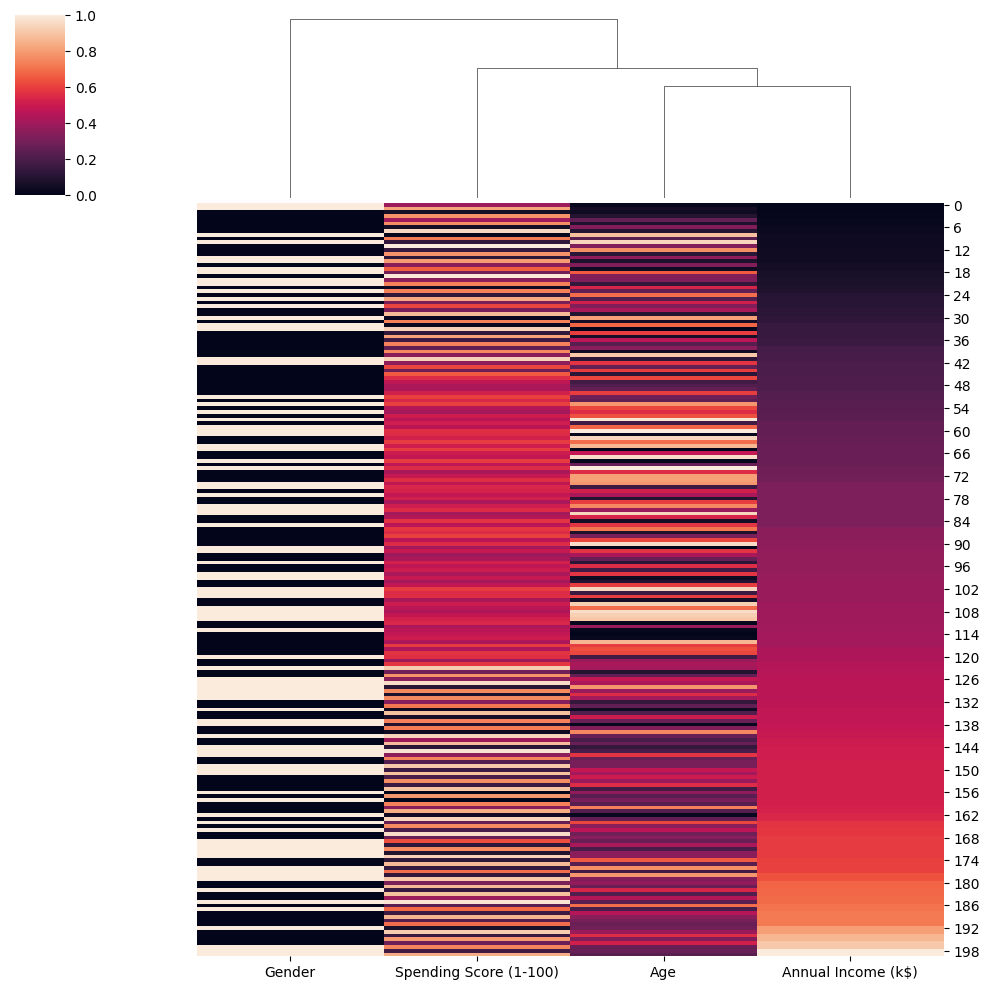

In [ ]:
sns.clustermap(new_df,row_cluster=False)

#**Hierarchial Clustering showing relationship between observations**

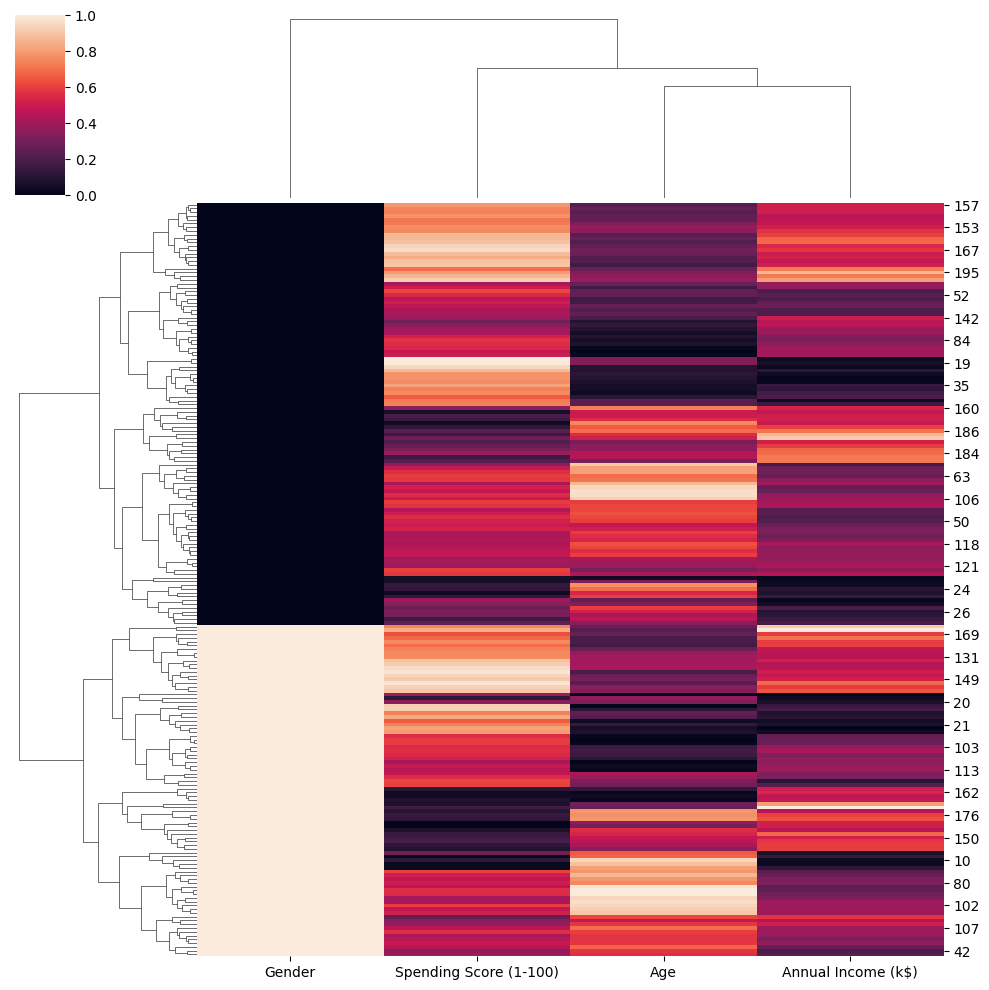

In [ ]:
sns.clustermap(new_df,row_cluster=True)

#**Agglomerative (Hierarchial) Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,metric='euclidean')
cluster_labels=ac.fit_predict(new_df)

In [ ]:
print(cluster_labels)

[0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0]


#**Plotting the clusters**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

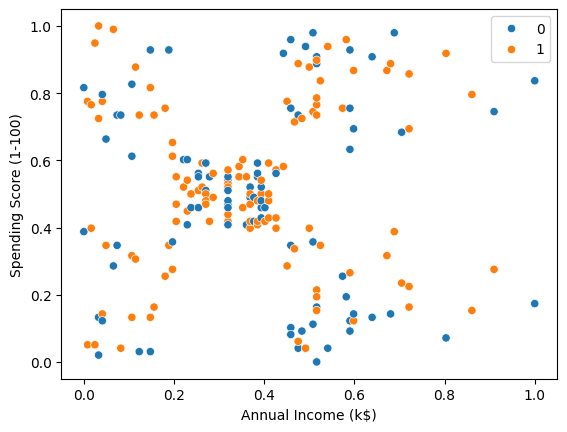

In [22]:
sns.scatterplot(x=new_df['Annual Income (k$)'],y=new_df['Spending Score (1-100)'],hue=cluster_labels)